In [ ]:
from pyexpat import features
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split


# fetch dataset
census_income_kdd = fetch_ucirepo(id=117)

# data (as pandas dataframes)
X = census_income_kdd.data.features
y = census_income_kdd.data.targets


In [ ]:
import pandas as pd
df_features=pd.DataFrame(X)
df_targets=pd.DataFrame(y)

 doing the target encoding

In [ ]:
# encoding the target values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_encoded_targets = encoder.fit_transform(df_targets['income'])

df_targets.head()
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the class mapping
print(class_mapping)

In [ ]:
count_A=df_encoded_targets.sum()
count_B= len(df_encoded_targets)-count_A
print(f'number of people which are in class >50k: {count_B}')
print(f'number of people which are in class <=50k: {count_A}')

doing th feautre encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
o_encoder= OrdinalEncoder()
l_endcoder= LabelEncoder()
df_features=df_features.fillna(-1)
df_features=df_features.astype(str)
df_encoded_features= o_encoder.fit_transform(df_features)

# df_encoded_features = pd.DataFrame(df_encoded_features)
# df_encoded_targets = pd.DataFrame(df_encoded_targets)

### splitting the data first to avoid data leakage

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_encoded_features, df_encoded_targets, test_size=0.2, random_state=42)

ADASYN, SMOTE, RandomOverSampler

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [ ]:
adasyn= ADASYN()
smote=SMOTE()
rs=RandomOverSampler()

df_adasyn_features, df_adasyn_targets=adasyn.fit_resample(X_train, y_train)
df_smote_features, df_smote_targets=smote.fit_resample(X_train, y_train)
df_rs_features, df_rs_targets=rs.fit_resample(X_train, y_train)

In [ ]:

count_A=df_adasyn_targets.sum()
count_B= len(df_adasyn_targets)-count_A
print(f'ADASYN number of people which are in class +50k: {count_B.item()}')
print(f'ADASYN number of people which are in class -=50k: {count_A.item()}')

In [ ]:
count_A=df_smote_targets.sum()
count_B= len(df_smote_targets)-count_A
print(f'SMOTE number of people which are in class +50k: {count_B.item()}')
print(f'SMOTE number of people which are in class -=50k: {count_A.item()}')

In [ ]:
count_A=df_rs_targets.sum()
count_B= len(df_rs_targets)-count_A

print(f'RANDOMSAMPLER number of people which are in class +50k: {count_B.item()}')
print(f'RANDOMSAMPLER number of people which are in class -=50k: {count_A.item()}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# defining the models
model_A= LogisticRegression()
model_S=LogisticRegression()
model_RS=LogisticRegression()
# training the models
model_A.fit(df_adasyn_features,df_adasyn_targets)
model_S.fit(df_smote_features,df_smote_targets)
model_RS.fit(df_rs_features,df_rs_targets)
# making the predictions
adasyn_preds= model_A.predict(X_test)
smote_preds=model_S.predict(X_test)
rs_preds=model_RS.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
# getting the accuracy and confuasion matrix form the mdoels
adasyn_acc= balanced_accuracy_score(y_test,adasyn_preds)
matrix_A=confusion_matrix(y_test, adasyn_preds)
print(f'The balanced accuracy score score of the model_A: {adasyn_acc}')
matrix_S=confusion_matrix(y_test, smote_preds)
S_acc= balanced_accuracy_score(y_test,smote_preds)
print(f'The balanced accuracy score score of the model_S: {S_acc}')
matrix_RS=confusion_matrix(y_test, rs_preds)
RS_acc= balanced_accuracy_score(y_test,rs_preds)
print(f'The balanced accuracy score score of the model_RS: {RS_acc}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
matrix_list=[matrix_A, matrix_S,matrix_RS]
for matrix in matrix_list:
  plt.figure(figsize=(6, 4))
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()


### knn classifier on first run

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(2)
model_KNN.fit(df_adasyn_features,df_adasyn_targets)
knn_preds=model_KNN.predict(X_test)

In [ ]:
knn_acc= balanced_accuracy_score(y_test,knn_preds)
matrix_knn=confusion_matrix(y_test,knn_preds)
print(f'The balanced accuracy score score of the model: {knn_acc}')

In [ ]:
# knn classifi
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN on second run(split later)

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [ ]:
# importing data
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
census_income_kdd = fetch_ucirepo(id=117)
X = census_income_kdd.data.features
y = census_income_kdd.data.targets

In [ ]:
# encoding the labels and features
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
o_encoder= OrdinalEncoder()
l_endcoder= LabelEncoder()
X=X.fillna(-1)
X=X.astype(str)
X_encoded_features= o_encoder.fit_transform(X)
y_encoded_targets=o_encoder.fit_transform(y)


In [ ]:
# using only ADASYN
adasyn= ADASYN()
X_adasyn_features, y_adasyn_targets=adasyn.fit_resample(X_encoded_features,y_encoded_targets)

In [ ]:
# spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_adasyn_features, y_adasyn_targets, test_size=0.2, random_state=42)

In [ ]:
# training two models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model_LR= LogisticRegression()
model_KNN=KNeighborsClassifier(2)

model_KNN.fit(df_adasyn_features,df_adasyn_targets)
model_LR.fit(df_adasyn_features,df_adasyn_targets)

knn_preds=model_KNN.predict(X_test)
LR_preds=model_LR.predict(X_test)

In [ ]:
# checking acc of models
knn_acc= balanced_accuracy_score(y_test,knn_preds)
matrix_knn=confusion_matrix(y_test,knn_preds)
print(f'The balanced accuracy score score of the model_knn: {knn_acc}')

LR_acc= balanced_accuracy_score(y_test,LR_preds)
matrix_LR=confusion_matrix(y_test,LR_preds)
print(f'The balanced accuracy score score of the model_LR: {LR_acc}')

In [ ]:
#  confusion mnatrix of logistic regression model
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# confusion matirx of KNN model
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

+ when i split the data before doing the upsampling *to avoide data leakage* logistic regression model **(0.79)** performs better than KNN model **(0.68)**.
+ when i split the data after doing the upsampling logistic regression model**(0.79)** performs worse than KNN model**(0.89)**.
+ **accuracy of KNN model increased while the accuracy of logistic regression model remained same.**

Q: why did KNN perfom worse in first run and better in second run? is this becasue of the data leakage?


# 28-11-2024

hint: make a entroy function

In [56]:
#reading the data
import pandas as pd
#table= pd.read_csv(r'C:\Users\kashi\Desktop\II SEM\ML\lecture_7\decision-tree.txt',colums)
columns = ['outlook', 'temp', 'humidity', 'wind', 'play', 'Play2']
df = pd.read_csv(r'C:\Users\kashi\Desktop\II SEM\ML\lecture_7\decision-tree.txt', delimiter='|', skipinitialspace=True, header=None, names=columns)
df = df.drop(columns=['Play2'])
df

outlook   temp humidity     wind play
NaN 1       Sunny   Hot      High     Weak   No
    2      Sunny     Hot     High   Strong   No
    3   Overcast     Hot     High    Weak   Yes
    4        Rain  Mild      High     Weak  Yes
    5       Rain   Cool    Normal    Weak   Yes
    6       Rain   Cool   Normal    Strong   No
    7   Overcast    Cool   Normal  Strong   Yes
    8       Sunny   Mild     High     Weak   No
    9      Sunny    Cool   Normal     Weak  Yes
    10       Rain  Mild    Normal     Weak  Yes
    11      Sunny   Mild   Normal  Strong   Yes
    12   Overcast   Mild    High    Strong  Yes
    13  Overcast     Hot  Normal      Weak  Yes
    14       Rain  Mild     High    Strong   No

In [58]:
df.columns

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [59]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
encoder= LabelEncoder()
columns=df.columns
for col in df.columns:
  df[col]= encoder.fit_transform(df[col])
df

In [60]:
df

outlook  temp  humidity  wind  play
NaN 1         4     3         0     2     0
    2         5     2         0     0     0
    3         1     2         0     3     1
    4         2     5         0     2     1
    5         3     1         2     3     1
    6         3     1         3     0     0
    7         1     0         2     1     1
    8         4     4         0     2     0
    9         5     0         2     2     1
    10        2     5         2     2     1
    11        4     4         2     1     1
    12        0     4         1     0     1
    13        1     2         3     2     1
    14        2     5         1     0     0

In [47]:
from sklearn.tree import DecisionTreeClassifier

:
    

In [48]:
model =DecisionTreeClassifier()

In [61]:
features= df[['outlook','temp','humidity','wind']]
lables=df['play']

In [62]:
model.fit(features, lables)

DecisionTreeClassifier()

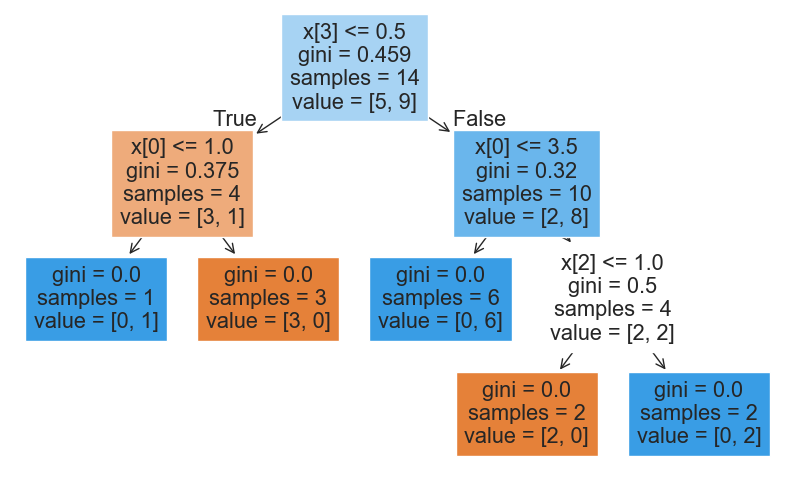

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(model, filled=True)

plt.show()